In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import sys
sys.path.append('..')
import scipy.constants as const
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from src.utilities import *
from tqdm.notebook import tqdm
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filedirectory = "\\Users\\diego\\Documents\\resilio_FERBO\\FB_W10_S4\\run2\\FBW10S4_"
datasets = {}

data_number_list = [
    413199, #big upper map
    # 411703, # largo
    412505, # bueno
]

for datanumber in tqdm(data_number_list):
    datasets[datanumber] = load_data(filedirectory +str(datanumber))

  0%|          | 0/2 [00:00<?, ?it/s]

# Fit wiht spline

g from fit A is [19.52221779] MHz
g from fit B is [18.39081972] MHz


 c:\Users\jc269556\Documents\analysis\utilities.py: 119

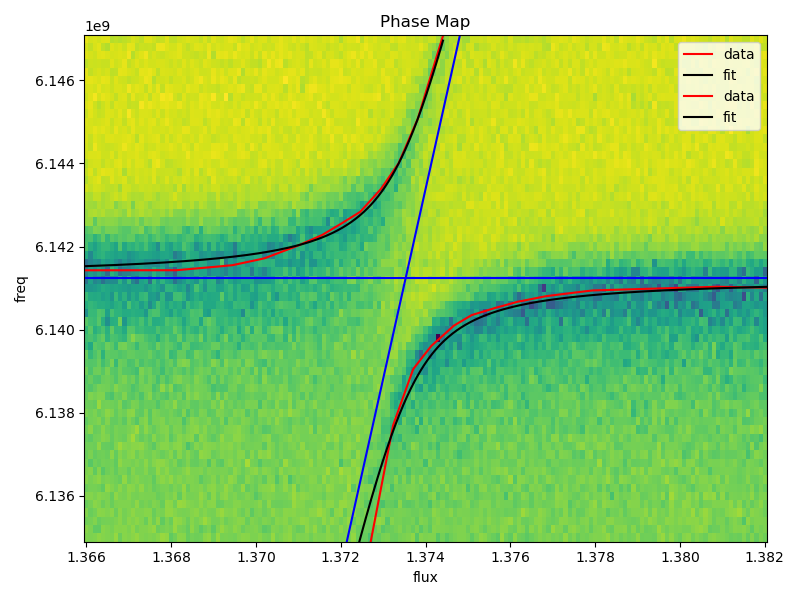

In [ ]:
########################  fit with the spline  ##########################

%matplotlib widget

curvaA = np.loadtxt("U:\\Commun\\Projet FERBO\\Simulations\\splineA.txt")
curvaB = np.loadtxt("U:\\Commun\\Projet FERBO\\Simulations\\splineB.txt")

iA = np.argmin(np.abs(curvaA[:,0] - 1.37443))
iB = np.argmin(np.abs(curvaB[:,0] - 1.37243))

xA = curvaA[:iA,0]
xB = curvaB[iB:,0]
x = np.arange(1.366,1.382,0.0001)
fr = 6.14125e9
fq = 4.566e9*x - 0.1303e9

def cA(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq +np.sqrt((fq - fr)**2 + (g/np.pi)**2))

def cB(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq - np.sqrt((fq - fr)**2 + (g/np.pi)**2))


poptA, pcovA = curve_fit(cA, xA, curvaA[:iA,1], p0 = 10e6)
print('g from fit A is', poptA*1e-6, 'MHz')

poptB, pcovB = curve_fit(cB, xB, curvaB[iB:,1], p0 = 10e6)
print('g from fit B is', poptB*1e-6, 'MHz')

fig, ax, mesh = plot3D(datasets[412505], 'flux', 'freq', 'amp', title='Phase Map', flatten_horizontal=False, flatten_vertical=False, fig=None, ax=None)
ax.axhline(6.14125e9,c='b')
ax.plot(x,fq,'b')

ax.plot(xA, curvaA[:iA,1],color='r', label='data')
ax.plot(xA,cA(xA,poptA),color = 'k', label='fit')

ax.plot(xB, curvaB[iB:,1],color='r', label='data')
ax.plot(xB,cB(xB,poptB),color = 'k', label='fit')


ax.legend()
# ax.plot(x,cB(x,poptB),color = 'b', label='fit')

plt.ylim([6.1349e9,6.14708e9])
plt.show()


# Fit with fit

In [3]:
# def dip_slope(w, w0, m, b, a, Q):   # entre 0 y 10
#     w0 = w0*1e9
#     m = m*1e-8
#     b = b *100
#     Q = Q*1000

#     y = (w-w0)/w0
#     return b + m*w + np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2))

def dip_step(w, w0, s, a, Q):   # entre 0 y 10
    w0 = w0*1e9
    Q = Q*1000

    y = (w-w0)/w0
    return 0.5*step*(1 + np.tanh(slope*(w - center))) + s*np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2)) + offset

amp = datasets[412505]['amp']
ampV = np.sqrt(0.05)*10**(amp/20)
amp_norm = ampV/ampV.mean()
x = datasets[412505]['flux']
iA = np.argmin(np.abs(x - 1.37443))
xA = x[:iA]
iB = np.argmin(np.abs(x - 1.37243)) + 6
xB = x[iB:]

y = datasets[412505]['freq']
y = y[0,:]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


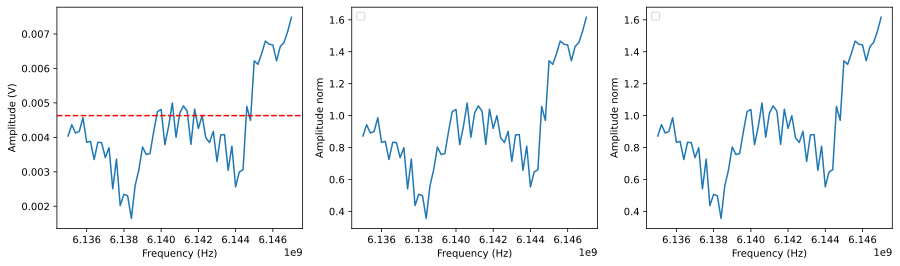

In [4]:
x_value = 1.3734

ix = np.argmin(np.abs(x - x_value))
# amp_norm = ampV[ix,:]/ampV[ix,:].mean()

fig,ax = plt.subplots(1,3,figsize = (15,4))#, sharey=True)
ax[0].plot(y,ampV[ix,:])
ax[0].axhline(ampV.mean(),color='r', linestyle='--')
ax[0].set_ylabel('Amplitude (V)')
ax[0].set_xlabel('Frequency (Hz)')

# fit_params_slope, _ = curve_fit(dip_slope, y, amp_norm[ix,:] , p0 = [6.141, 6, -3.68, 0.5, 1])  # params bw 1 and 10
ax[1].plot(y,amp_norm[ix,:])
# ax[1].plot(y,dip_slope(y,fit_params_slope[0],fit_params_slope[1],fit_params_slope[2],fit_params_slope[3], fit_params_slope[4]), label = 'fit slope') 
ax[1].set_ylabel('Amplitude norm')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].legend()

# print(fit_params_slope)
# print(' w0 = ',fit_params_slope[0], 'GHz')

# fit_params_step, _ = curve_fit(dip_step, y, amp_norm[ix,:] , p0 = [6.141, 0.6, 0.5, 1])  # params bw 1 and 10
ax[2].plot(y,amp_norm[ix,:])
# ax[2].plot(y,dip_step(y,fit_params_step[0],fit_params_step[1],fit_params_step[2],fit_params_step[3]), label = 'fit step')
ax[2].set_ylabel('Amplitude norm')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].legend()

# print(fit_params_step)
# print(' w0 = ',fit_params_step[0], 'GHz')



In [5]:
####################  finding points for curve A  ######################

step = 0.75
slope = 0.00000045
center = 6.143e9
offset = -1.39

p0 = [6.1413, 2.25, 0.16,  2.55]
fit_params  = np.zeros((len(xA),len(p0)))
fit_params[-1,:]  = p0

for i, x_value in enumerate(xA):

    limit_w = max(y[0] , 1.78796e9*x_value + 3.68549e9)
    limit_ind = np.argmin(np.abs(y - limit_w))
    fit_params[i,:], _ = curve_fit(dip_step, y[limit_ind:], amp_norm[i,limit_ind:] , p0 = fit_params[i-1,:])

curveA = 1e9*fit_params[:,0]


In [6]:
####################  finding points for curve B  ######################

step = 0.75
slope = 0.00000045
center = 6.140e9
offset = -1.39

p0 = [6.13759 , 2.126 ,0.474,94.27]
fit_params  = np.zeros((len(xB),len(p0)))
fit_params[-1,:]  = p0

# x_start = y[0] - 3.68549e9)/1.78796e9
# start_ind = np.argmin(np.abs(x - x_start))

for i, x_value in enumerate(xB):

    limit_w = min(y[-1] , 1.78796e9*x_value + 3.68549e9)
    limit_ind = np.argmin(np.abs(y - limit_w))
    fit_params[i,:], _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind] , p0 = fit_params[i-1,:])


curveB = 1e9*fit_params[:,0]

[ 6.14075746  2.27287112  0.2652394  -2.35054077]
1.378 6147000000.0


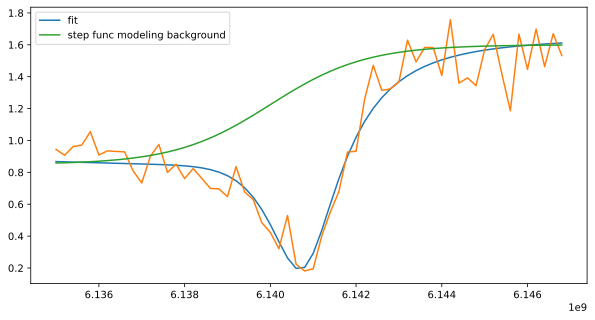

In [7]:

plt.close('all')
step = 0.75
slope = 0.00000045
center = 6.140e9
offset = -1.37
# s = 2.29064911

i = 50
limit_w = min(y[-1] ,  1.78796e9*xB[i] + 3.68549e9)
limit_ind = np.argmin(np.abs(y - limit_w))
# fit_params_, _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind], p0 = [6.13759 , 2.126 ,0.474,94.27])
fit_params_, _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind] , p0 = fit_params[i-1,:])

fig, ax = plt.subplots(1,1,figsize = (10,5), sharey=True)
ax.plot(y[:limit_ind],dip_step(y[:limit_ind],fit_params_[0],fit_params_[1],fit_params_[2] ,fit_params_[3]),label = 'fit')#,fit_params_[4])) 
# ax.plot(y[:limit_ind],dip_step(y[:limit_ind], 6.14025939, 2.29064911, 0.1649742, 3.44429617))
ax.plot(y[:limit_ind], amp_norm[iB + i,:limit_ind])
ax.plot(y[:limit_ind], .85 + 0.5*step*(1 + np.tanh(slope*(y[:limit_ind] - center))),label = 'step func modeling background')
ax.legend()
print(fit_params_)
print(xB[i],limit_w)

 <>: 46SyntaxWarning: invalid escape sequence '\p'
 <>: 49SyntaxWarning: invalid escape sequence '\p'
 <>: 46SyntaxWarning: invalid escape sequence '\p'
 <>: 49SyntaxWarning: invalid escape sequence '\p'
 C:\Users\diego\AppData\Local\Temp\ipykernel_11932\2558338967.py: 46SyntaxWarning: invalid escape sequence '\p'
 C:\Users\diego\AppData\Local\Temp\ipykernel_11932\2558338967.py: 49

g/2$\pi$ from fit A is 2.82555851515555 MHz  with error  115.99294202302671
g/2$\pi$ from fit B is 2.792208189862587 MHz  with error  106.93077733425656


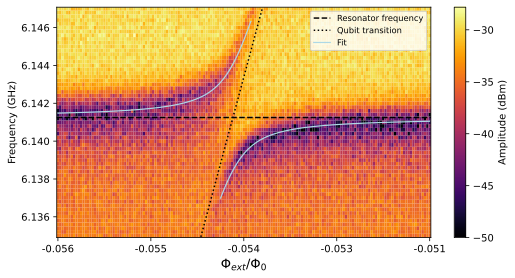

In [10]:
########################  fit with the actual values  ##########################

%matplotlib inline
plt.close('all')

amp = datasets[412505]['amp']
ampV = np.sqrt(0.05)*10**(amp/20)
amp_norm = ampV/ampV.mean()
x = datasets[412505]['flux']
iA = np.argmin(np.abs(x - 1.37443))
xA = x[:iA]
iB = np.argmin(np.abs(x - 1.37243)) + 6
xB = x[iB:]

y = datasets[412505]['freq']
y = y[0,:]

fig, ax = plt.subplots(figsize=(7.5,4))
_, _, mesh = plot3D(datasets[412505], 
                       'flux', 
                       'freq', 
                       'amp', 
                       fig=fig, 
                       ax=ax,
                       add_colorbar = False,
                       cmap = 'inferno',
                       vmin = -50
                       )

fr = 6.14125e9
fq = 4.566e9*x - 0.1303e9
voltage_period = 3.033
zero_flux = 1.5373
# line = 1.78796e9*x + 3.684e9

def cA(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq +np.sqrt((fq - fr)**2 + (g/np.pi)**2))

def cB(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq - np.sqrt((fq - fr)**2 + (g/np.pi)**2))


poptA, pcovA = curve_fit(cA, xA, curveA, p0 = 10e6)
print('g/2$\pi$ from fit A is', poptA[0]*(1e-6)/(2*np.pi), 'MHz  with error ', np.sqrt(pcovA[0,0]*(1e-6)/(2*np.pi)))

poptB, pcovB = curve_fit(cB, xB, curveB, p0 = 10e6)
print('g/2$\pi$ from fit B is', poptB[0]*(1e-6)/(2*np.pi), 'MHz  with error ', np.sqrt(pcovB[0,0]*(1e-6)/(2*np.pi)))

ax.axhline(fr,c='k',linestyle = '--', label='Resonator frequency')
ax.plot(x,fq,'k',linestyle = ':', label='Qubit transition')

# ax.plot(xA, curveA, '.k', label='data')
ax.plot(xA, cA(xA,poptA), color = 'lightblue', linewidth = 1.2, label='Fit')

# ax.plot(xB, curveB, '.k')
ax.plot(xB, cB(xB,poptB), color = 'lightblue',linewidth = 1.2)

ax.legend(fontsize = 'small')
ax.set_xlabel(r'$\Phi_{ext}/\Phi_0$', fontsize = 13)
tick_labels = np.round((np.array([1.366, 1.370, 1.374, 1.378, 1.382]) - zero_flux)/voltage_period , 3)
ax.set_xticks([1.366, 1.370, 1.374, 1.378, 1.382],tick_labels)
ax.set_yticks([6.146e9, 6.144e9,6.142e9,6.140e9,6.138e9,6.136e9],[6.146, 6.144,6.142,'6.140',6.138,6.136])

ax.set_ylabel('Frequency (GHz)')
ax.set_ylim([6.1349e9,6.14708e9])
cbar = fig.colorbar(mesh, ax = ax)
cbar.set_label('Amplitude (dBm)')
cbar.set_ticks([-30,-35,-40,-45,-50])


fig.tight_layout()
# plt.savefig('1tonevsfluxzoom.png',dpi = 800)
plt.show()

